In [27]:
import pandas as pd

base_path = "/kaggle/input/rawdata/"

def load_power_csv(filename):
    return pd.read_csv(
        base_path + filename,
        skiprows=10,        # skip NASA metadata (key fix)
        sep=",",            # force comma
        engine="python",    # more flexible parser
        on_bad_lines="skip"
    )

In [28]:
prayagraj  = load_power_csv("prayagraj.csv")
jaipur     = load_power_csv("jaipur.csv")
mumbai     = load_power_csv("mumbai.csv")
patna      = load_power_csv("patna.csv")
bengaluru  = load_power_csv("bengaluru.csv")

In [29]:
print(prayagraj.columns)
prayagraj.head()

Index(['PARAMETER', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANN'],
      dtype='object')


,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PRECTOTCORR_SUM,2010,4.65,20.13,0.00,0.31,9.18,13.03,197.92,142.26,99.70,22.67,14.48,1.62,525.95
1,PRECTOTCORR_SUM,2011,0.05,4.74,0.81,2.78,21.73,257.13,238.26,279.04,231.89,1.94,0.00,2.99,1041.36
2,PRECTOTCORR_SUM,2012,38.65,2.09,2.98,9.51,0.26,13.76,375.92,269.04,332.57,2.32,0.28,0.00,1047.38
3,PRECTOTCORR_SUM,2013,2.93,63.63,11.01,4.26,2.93,315.14,246.35,271.15,62.40,217.86,0.00,1.71,1199.37
4,PRECTOTCORR_SUM,2014,59.51,46.03,5.68,0.72,5.47,35.29,207.87,134.73,118.75,86.26,0.00,23.12,723.43


In [30]:
def clean_power(df):
    df = df[["PARAMETER", "YEAR", "ANN"]]
    df = df.rename(columns={"ANN": "VALUE"})
    return df

In [31]:
prayagraj_c = clean_power(prayagraj)

In [32]:
rain = prayagraj_c[prayagraj_c["PARAMETER"] == "PRECTOTCORR_SUM"]
temp = prayagraj_c[prayagraj_c["PARAMETER"] == "T2M"]

In [33]:
rain = rain.rename(columns={"VALUE": "Rainfall_mm"})
temp = temp.rename(columns={"VALUE": "Avg_Temperature_C"})

In [34]:
prayagraj_final = pd.merge(
    rain[["YEAR", "Rainfall_mm"]],
    temp[["YEAR", "Avg_Temperature_C"]],
    on="YEAR"
)

In [35]:
prayagraj_final["City"] = "Prayagraj"
prayagraj_final["State"] = "Uttar Pradesh"
prayagraj_final["Climate_Type"] = "Indo-Gangetic Plain"

In [36]:
prayagraj_final.head()
prayagraj_final.describe()

,YEAR,Rainfall_mm,Avg_Temperature_C
count,15.000000,15.000000,15.000000
mean,2017.000000,911.459333,26.434667
std,4.472136,189.032315,0.667916
min,2010.000000,525.950000,25.110000
25%,2013.500000,789.365000,26.050000
50%,2017.000000,908.330000,26.440000
75%,2020.500000,1057.980000,26.850000
max,2024.000000,1199.370000,27.720000


In [39]:
import pandas as pd

base_path = "/kaggle/input/rawdata/"

def load_power_csv(filename):
    return pd.read_csv(
        base_path + filename,
        skiprows=10,          # skips NASA metadata safely
        sep=",",
        engine="python"
    )

# Load all cities
prayagraj  = load_power_csv("prayagraj.csv")
jaipur     = load_power_csv("jaipur.csv")
mumbai     = load_power_csv("mumbai.csv")
patna      = load_power_csv("patna.csv")
bengaluru  = load_power_csv("bengaluru.csv")

In [40]:
prayagraj.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PRECTOTCORR_SUM,2010,4.65,20.13,0.00,0.31,9.18,13.03,197.92,142.26,99.70,22.67,14.48,1.62,525.95
1,PRECTOTCORR_SUM,2011,0.05,4.74,0.81,2.78,21.73,257.13,238.26,279.04,231.89,1.94,0.00,2.99,1041.36
2,PRECTOTCORR_SUM,2012,38.65,2.09,2.98,9.51,0.26,13.76,375.92,269.04,332.57,2.32,0.28,0.00,1047.38
3,PRECTOTCORR_SUM,2013,2.93,63.63,11.01,4.26,2.93,315.14,246.35,271.15,62.40,217.86,0.00,1.71,1199.37
4,PRECTOTCORR_SUM,2014,59.51,46.03,5.68,0.72,5.47,35.29,207.87,134.73,118.75,86.26,0.00,23.12,723.43


In [41]:
import pandas as pd

# ---------- FUNCTION TO CLEAN ONE CITY ----------
def prepare_city(df, city, state, climate_type):
    df = df[df["PARAMETER"] == "PRECTOTCORR_SUM"]  # rainfall only
    df = df[["YEAR", "ANN"]]
    df.columns = ["Year", "Rainfall_mm"]
    
    df["City"] = city
    df["State"] = state
    df["Climate_Type"] = climate_type
    
    return df.reset_index(drop=True)

# ---------- APPLY TO ALL CITIES ----------
prayagraj_c = prepare_city(prayagraj, "Prayagraj", "Uttar Pradesh", "Indo‑Gangetic Plain")
jaipur_c    = prepare_city(jaipur, "Jaipur", "Rajasthan", "Arid / Semi‑arid")
mumbai_c    = prepare_city(mumbai, "Mumbai", "Maharashtra", "Coastal")
patna_c     = prepare_city(patna, "Patna", "Bihar", "Flood‑prone")
bengaluru_c = prepare_city(bengaluru, "Bengaluru", "Karnataka", "Moderate / Plateau")

# ---------- MERGE ALL ----------
climate_all = pd.concat(
    [prayagraj_c, jaipur_c, mumbai_c, patna_c, bengaluru_c],
    ignore_index=True
)

# ---------- CHECK ----------
print(climate_all.shape)
climate_all.head()

(75, 5)


,Year,Rainfall_mm,City,State,Climate_Type
0,2010,525.95,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain
1,2011,1041.36,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain
2,2012,1047.38,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain
3,2013,1199.37,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain
4,2014,723.43,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain


In [42]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ---------- NORMALIZE RAINFALL (CITY-WISE) ----------
climate_all["Rainfall_Norm"] = climate_all.groupby("City")["Rainfall_mm"]\
    .transform(lambda x: MinMaxScaler().fit_transform(x.values.reshape(-1,1)).flatten())

# ---------- CLIMATE RISK SCORE ----------
# Middle rainfall = safer, extremes = riskier
climate_all["Climate_Risk_Score"] = abs(climate_all["Rainfall_Norm"] - 0.5) * 2

# ---------- CLASSIFY RISK LEVEL ----------
def risk_label(score):
    if score >= 0.66:
        return "High Risk"
    elif score >= 0.33:
        return "Moderate Risk"
    else:
        return "Low Risk"

climate_all["Climate_Risk"] = climate_all["Climate_Risk_Score"].apply(risk_label)

# ---------- CHECK ----------
climate_all.head()

,Year,Rainfall_mm,City,State,Climate_Type,Rainfall_Norm,Climate_Risk_Score,Climate_Risk
0,2010,525.95,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,0.000000,1.000000,High Risk
1,2011,1041.36,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,0.765362,0.530724,Moderate Risk
2,2012,1047.38,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,0.774301,0.548603,Moderate Risk
3,2013,1199.37,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,1.000000,1.000000,High Risk
4,2014,723.43,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,0.293249,0.413501,Moderate Risk


In [43]:
climate_all.groupby("City")["Climate_Risk"].value_counts()

City       Climate_Risk 
Bengaluru  High Risk        6
           Low Risk         6
           Moderate Risk    3
Jaipur     Low Risk         6
           High Risk        5
           Moderate Risk    4
Mumbai     High Risk        6
           Moderate Risk    5
           Low Risk         4
Patna      Low Risk         6
           Moderate Risk    5
           High Risk        4
Prayagraj  Moderate Risk    7
           Low Risk         5
           High Risk        3
Name: count, dtype: int64

# 📊 1️⃣ Climate Risk Distribution by City (Stacked Bar)

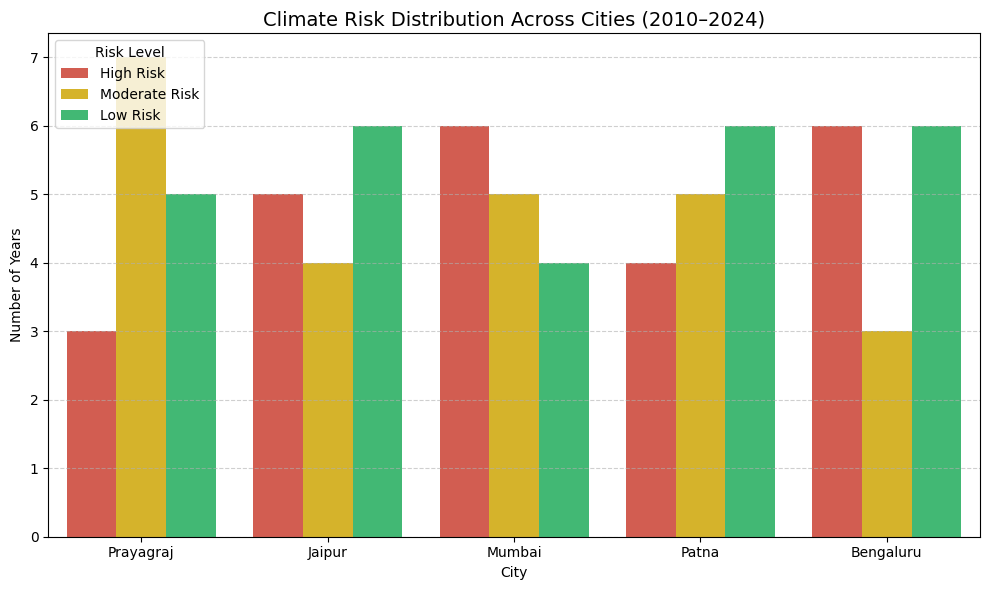

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(
    data=climate_all,
    x="City",
    hue="Climate_Risk",
    palette={"Low Risk":"#2ecc71", "Moderate Risk":"#f1c40f", "High Risk":"#e74c3c"}
)

plt.title("Climate Risk Distribution Across Cities (2010–2024)", fontsize=14)
plt.xlabel("City")
plt.ylabel("Number of Years")
plt.legend(title="Risk Level")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 🌧️ 2️⃣ Rainfall Trend Over Time (Multi‑City Line Plot)

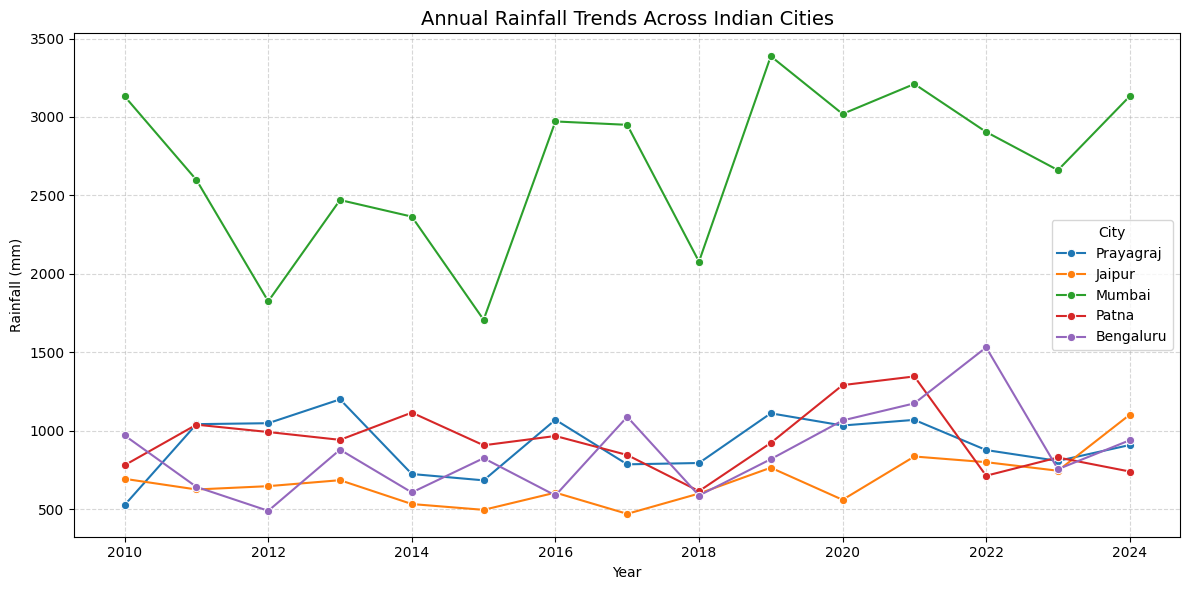

In [45]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=climate_all,
    x="Year",
    y="Rainfall_mm",
    hue="City",
    marker="o"
)

plt.title("Annual Rainfall Trends Across Indian Cities", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#  3️⃣ Climate Risk Score Heatmap (🔥 very impressive)

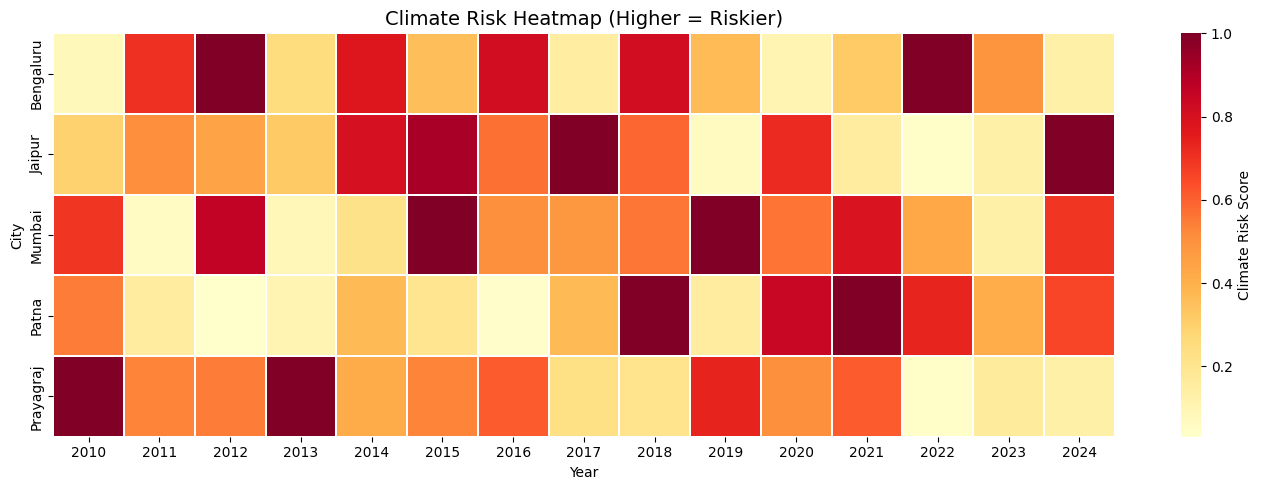

In [46]:
pivot = climate_all.pivot_table(
    index="City",
    columns="Year",
    values="Climate_Risk_Score"
)

plt.figure(figsize=(14,5))
sns.heatmap(
    pivot,
    cmap="YlOrRd",
    linewidths=0.3,
    cbar_kws={"label": "Climate Risk Score"}
)

plt.title("Climate Risk Heatmap (Higher = Riskier)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("City")
plt.tight_layout()
plt.show()

## Loading & Merging NASA POWER Climate Data (Multi‑City)

This step loads annual precipitation data for multiple Indian cities
from NASA POWER CSV files, cleans the data, and merges it into a single
dataset for analysis.


In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ---------- BASE PATH (Kaggle) ----------
base_path = "/kaggle/input/rawdata/"

# ---------- FUNCTION TO LOAD NASA POWER CSV ----------
def load_nasa_csv(filename):
    df = pd.read_csv(
        base_path + filename,
        sep=",",
        skiprows=10,          # NASA POWER metadata rows
    )
    return df

# ---------- LOAD DATA ----------
prayagraj  = load_nasa_csv("prayagraj.csv")
jaipur     = load_nasa_csv("jaipur.csv")
mumbai     = load_nasa_csv("mumbai.csv")
patna      = load_nasa_csv("patna.csv")
bengaluru  = load_nasa_csv("bengaluru.csv")

# ---------- DATASET DICTIONARY ----------
datasets = {
    "Prayagraj": (prayagraj, "Uttar Pradesh", "Indo‑Gangetic Plain"),
    "Jaipur": (jaipur, "Rajasthan", "Arid / Semi‑arid"),
    "Mumbai": (mumbai, "Maharashtra", "Coastal"),
    "Patna": (patna, "Bihar", "Flood‑prone"),
    "Bengaluru": (bengaluru, "Karnataka", "Moderate / Plateau")
}

# ---------- FILTER, CLEAN & MERGE ----------
all_data = []

for city, (df, state, climate) in datasets.items():
    df = df[df["PARAMETER"] == "PRECTOTCORR_SUM"].copy()  # annual rainfall
    df.loc[:, "City"] = city
    df.loc[:, "State"] = state
    df.loc[:, "Climate_Type"] = climate
    df.loc[:, "Rainfall_mm"] = df["ANN"]
    all_data.append(df)

# ---------- COMBINE ALL CITIES ----------
climate_all = pd.concat(all_data, ignore_index=True)

# ---------- NORMALIZE RAINFALL ----------
scaler = MinMaxScaler()
climate_all["Rainfall_Norm"] = scaler.fit_transform(
    climate_all[["Rainfall_mm"]]
)

# ---------- SIMPLE CLIMATE RISK SCORE ----------
# (Higher deviation from normal rainfall = higher risk)
climate_all["Climate_Risk_Score"] = abs(
    climate_all["Rainfall_Norm"] - climate_all.groupby("City")["Rainfall_Norm"].transform("mean")
)

# ---------- FINAL CHECK ----------
print("Dataset shape:", climate_all.shape)
climate_all.head()


Dataset shape: (75, 21)


,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANN,City,State,Climate_Type,Rainfall_mm,Rainfall_Norm,Climate_Risk_Score
0,PRECTOTCORR_SUM,2010,4.65,20.13,0.00,0.31,9.18,13.03,197.92,142.26,...,22.67,14.48,1.62,525.95,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,525.95,0.019343,0.132124
1,PRECTOTCORR_SUM,2011,0.05,4.74,0.81,2.78,21.73,257.13,238.26,279.04,...,1.94,0.00,2.99,1041.36,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,1041.36,0.195988,0.044520
2,PRECTOTCORR_SUM,2012,38.65,2.09,2.98,9.51,0.26,13.76,375.92,269.04,...,2.32,0.28,0.00,1047.38,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,1047.38,0.198051,0.046584
3,PRECTOTCORR_SUM,2013,2.93,63.63,11.01,4.26,2.93,315.14,246.35,271.15,...,217.86,0.00,1.71,1199.37,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,1199.37,0.250142,0.098675
4,PRECTOTCORR_SUM,2014,59.51,46.03,5.68,0.72,5.47,35.29,207.87,134.73,...,86.26,0.00,23.12,723.43,Prayagraj,Uttar Pradesh,Indo‑Gangetic Plain,723.43,0.087025,0.064443


## Food Security Risk Assessment

Food security is influenced by climate stressors such as rainfall variability
and temperature stress. In this step, we construct a Food Security Risk Index
using normalized climate indicators.  (Rainfall + Temperature)


In [9]:
print(climate_all.columns)


Index(['PARAMETER', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANN', 'City', 'State',
       'Climate_Type', 'Rainfall_mm', 'Rainfall_Norm', 'Climate_Risk_Score'],
      dtype='object')


In [11]:
all_data = []

for city, (df, state, climate) in datasets.items():
    df = df[df["PARAMETER"].isin(["PRECTOTCORR_SUM", "T2M"])].copy()

    df.loc[:, "City"] = city
    df.loc[:, "State"] = state
    df.loc[:, "Climate_Type"] = climate

    # Separate rainfall & temperature
    df.loc[df["PARAMETER"] == "PRECTOTCORR_SUM", "Rainfall_mm"] = df["ANN"]
    df.loc[df["PARAMETER"] == "T2M", "Avg_Temperature_C"] = df["ANN"]

    all_data.append(df)

climate_all = pd.concat(all_data, ignore_index=True)


In [12]:
climate_all = climate_all.groupby(
    ["City", "State", "Climate_Type", "YEAR"],
    as_index=False
).agg({
    "Rainfall_mm": "mean",
    "Avg_Temperature_C": "mean"
})


In [13]:
climate_all.columns


Index(['City', 'State', 'Climate_Type', 'YEAR', 'Rainfall_mm',
       'Avg_Temperature_C'],
      dtype='object')

In [14]:
from sklearn.preprocessing import MinMaxScaler

climate_all["Temp_Norm"] = climate_all.groupby("City")["Avg_Temperature_C"] \
    .transform(lambda x: MinMaxScaler().fit_transform(x.values.reshape(-1,1)).flatten())


# Food Security Risk Score

In [15]:
climate_all["Food_Security_Risk_Score"] = (
    0.5 * climate_all["Climate_Risk_Score"] +
    0.3 * climate_all["Temp_Norm"] +
    0.2 * (1 - climate_all["Rainfall_Norm"])
)


KeyError: 'Climate_Risk_Score'

In [19]:
# ---------- RAINFALL DEVIATION ----------
climate_all["Rainfall_Deviation"] = climate_all.groupby("City")["Rainfall_mm"] \
    .transform(lambda x: abs(x - x.mean()))


In [20]:
from sklearn.preprocessing import MinMaxScaler

climate_all["Climate_Risk_Score"] = climate_all.groupby("City")["Rainfall_Deviation"] \
    .transform(lambda x: MinMaxScaler().fit_transform(x.values.reshape(-1,1)).flatten())


In [21]:
climate_all.columns


Index(['City', 'State', 'Climate_Type', 'YEAR', 'Rainfall_mm',
       'Avg_Temperature_C', 'Temp_Norm', 'Rainfall_Deviation',
       'Climate_Risk_Score'],
      dtype='object')

In [23]:
from sklearn.preprocessing import MinMaxScaler

climate_all["Rainfall_Norm"] = climate_all.groupby("City")["Rainfall_mm"] \
    .transform(lambda x: MinMaxScaler().fit_transform(x.values.reshape(-1,1)).flatten())


In [24]:
climate_all.columns


Index(['City', 'State', 'Climate_Type', 'YEAR', 'Rainfall_mm',
       'Avg_Temperature_C', 'Temp_Norm', 'Rainfall_Deviation',
       'Climate_Risk_Score', 'Rainfall_Norm'],
      dtype='object')

In [25]:
climate_all["Food_Security_Risk_Score"] = (
    0.5 * climate_all["Climate_Risk_Score"] +   # rainfall variability
    0.3 * climate_all["Temp_Norm"] +             # heat stress
    0.2 * (1 - climate_all["Rainfall_Norm"])     # low rainfall penalty
)


In [26]:
def food_label(score):
    if score >= 0.66:
        return "Severe Insecurity"
    elif score >= 0.33:
        return "Moderate Insecurity"
    else:
        return "Relatively Secure"

climate_all["Food_Security_Status"] = climate_all["Food_Security_Risk_Score"].apply(food_label)


In [32]:
climate_all[
    ["City", "YEAR", "Rainfall_mm", "Avg_Temperature_C",
     "Climate_Risk_Score", "Food_Security_Risk_Score",
     "Food_Security_Status"]
].head(100)


,City,YEAR,Rainfall_mm,Avg_Temperature_C,Climate_Risk_Score,Food_Security_Risk_Score,Food_Security_Status
0,Bengaluru,2010,969.11,23.76,0.138837,0.295680,Relatively Secure
1,Bengaluru,2011,641.34,23.49,0.317013,0.396087,Moderate Insecurity
2,Bengaluru,2012,488.69,24.37,0.551093,0.710578,Severe Insecurity
3,Bengaluru,2013,878.57,23.60,0.000000,0.213066,Relatively Secure
4,Bengaluru,2014,605.90,24.06,0.371358,0.538979,Moderate Insecurity
...,...,...,...,...,...,...,...
70,Prayagraj,2020,1032.70,25.11,0.308885,0.203942,Relatively Secure
71,Prayagraj,2021,1068.58,25.82,0.402718,0.321812,Relatively Secure
72,Prayagraj,2022,876.22,26.30,0.083974,0.274741,Relatively Secure
73,Prayagraj,2023,807.04,26.44,0.264894,0.401839,Moderate Insecurity
